# 4. Seaborn Objects interfejs - Moderni Grammar of Graphics pristup

## Seminarski rad - SISJ


**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236 
**Datum:** Septembar 2025.\n


## 📊 Sta je Seaborn Objects interfejs?\n

**Seaborn Objects** je moderni API uveden u Seaborn 0.12+ koji implementira **Grammar of Graphics** pristup - inspirisan ggplot2 paketom iz R programskog jezika.

**Ključne karakteristike:**
- **Kompozicijska arhitektura** - kombinovanje osnovnih elemenata u složene vizualizacije
- **Deklarativni pristup** - opisujete šta želite da vidite, a ne kako da se napravi
- **Layer-based design** - dodavanje slojeva (layers) jedan preko drugog
- **Fleksibilnost** - precizna kontrola nad svakim aspektom vizualizacije
- **Skalabilnost** - radi sa malim i velikim dataset-ima

**Glavni koncepti:**
1. **Plot** - osnovni objekat koji sadrži podatke i coordinate system
2. **Mark** - vizualni elementi (dots, lines, bars, areas)
3. **Stat** - statistička transformacija podataka (count, mean, regression)
4. **Scale** - mapiranje podataka u vizualna svojstva (color, size, position)

**Osnovna sintaksa:**
```python\n
import seaborn.objects as so\n
so.Plot(data, x=\"var1\", y=\"var2\").add(so.Dots()).show()\n
```

In [17]:
# Import potrebnih biblioteka za Objects Interface
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Osnovne postavke
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style="whitegrid", context="talk")

# Učitavanje standardnih dataset-a
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
penguins = sns.load_dataset('penguins').dropna()
iris = sns.load_dataset('iris')

# Kreiranje dodatnih dataset-a za demonstraciju
np.random.seed(42)
demo_data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100) * 1.5 + 0.5,
    'category': np.random.choice(['A', 'B', 'C'], 100),
    'size': np.random.uniform(20, 100, 100)
})

# Provera verzije i dostupnosti
print(f"📊 Seaborn verzija: {sns.__version__}")
print(f"🔧 Objects API dostupan: {hasattr(sns, 'objects')}")
print(f"✅ Notebook pripremljen za Objects Interface demonstraciju!")

print(f"\n📈 DOSTUPNI DATASET-I:")
print(f"• Tips: {tips.shape} - restoranski podaci")
print(f"• Flights: {flights.shape} - putnici po mesecima")  
print(f"• Penguins: {penguins.shape} - morfološki podaci pingvina")
print(f"• Iris: {iris.shape} - klasični dataset cveta")
print(f"• Demo: {demo_data.shape} - sintetički podaci")

📊 Seaborn verzija: 0.13.2
🔧 Objects API dostupan: True
✅ Notebook pripremljen za Objects Interface demonstraciju!

📈 DOSTUPNI DATASET-I:
• Tips: (244, 7) - restoranski podaci
• Flights: (144, 3) - putnici po mesecima
• Penguins: (333, 7) - morfološki podaci pingvina
• Iris: (150, 5) - klasični dataset cveta
• Demo: (100, 4) - sintetički podaci


## 1. **Osnove Objects Interface-a**

### **Šta je Grammar of Graphics?**

**Grammar of Graphics** je teoretski okvir za kreiranje statističkih grafika koji dekomponuje grafike u osnovne gradivne blokove. Umesto da se fokusira na specifične tipove grafika (bar chart, scatter plot), fokusira se na komponente koje čine grafik.

**Ključni koncepti:**

🔧 **Komponente grafika:**
- **Data** - dataset koji se vizualizuje  
- **Aesthetics** - mapiranje varijabli u vizualna svojstva (x, y, color, size)
- **Geometries** - vizualni elementi koji predstavljaju podatke
- **Statistics** - transformacije podataka (mean, count, smooth)
- **Coordinates** - koordinatni sistem
- **Facets** - podela na pod-grafike
- **Themes** - vizuelno formatiranje

### **Zašto Objects Interface?**

**Tradicionalni seaborn pristup:**
```python
# Različite funkcije za različite grafike
sns.scatterplot(data, x="a", y="b")  # scatter
sns.lineplot(data, x="a", y="b")     # line  
sns.barplot(data, x="a", y="b")      # bar
```

**Objects Interface pristup:**
```python
# Jedna konzistentna sintaksa
so.Plot(data, x="a", y="b").add(so.Dot()).show()   # scatter
so.Plot(data, x="a", y="b").add(so.Line()).show()  # line
so.Plot(data, x="a", y="b").add(so.Bar()).show()   # bar
```

**Prednosti Objects Interface-a:**
- 🧩 **Kompozabilnost** - lako kombinovanje komponenti
- 🎯 **Konzistentnost** - ista sintaksa za sve tipove grafika  
- 🚀 **Fleksibilnost** - precizna kontrola nad svakim aspektom
- 📈 **Skalabilnost** - radi efikasno sa velikim podacima
- 🔄 **Iterativnost** - lako dodavanje i uklanjanje layer-a

🔄 POREĐENJE PRISTUPA
1️⃣ TRADICIONALNI SEABORN:
2️⃣ OBJECTS INTERFACE:


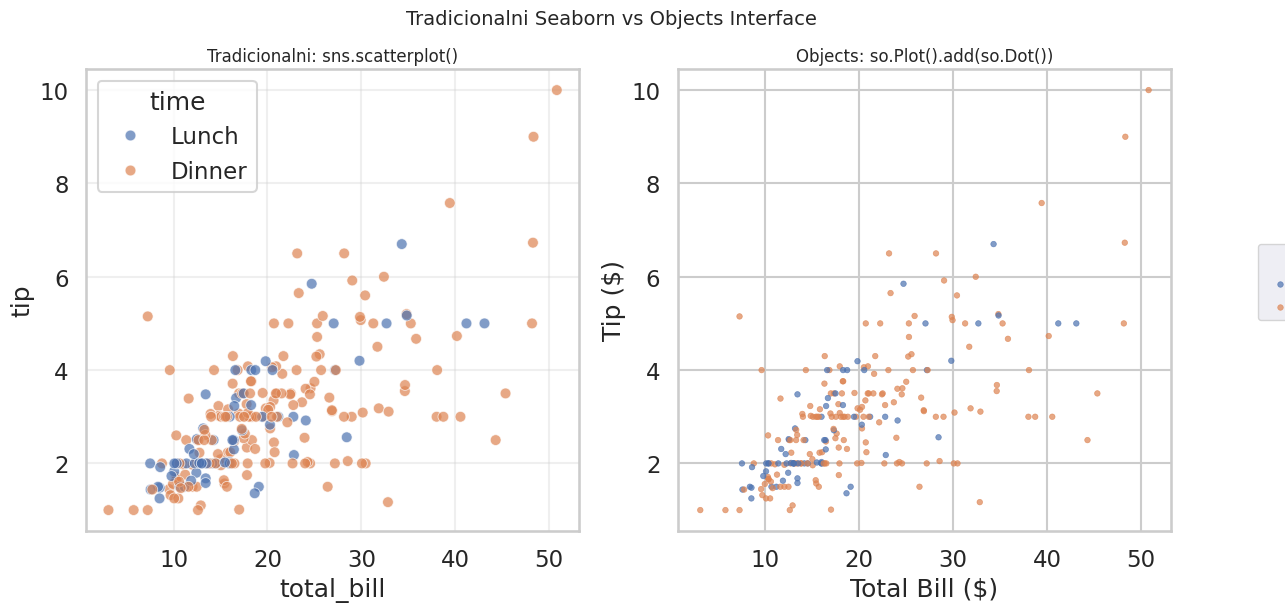

<Figure size 1200x800 with 0 Axes>


✅ KLJUČNE RAZLIKE:
• Tradicionalni: Specifična funkcija za svaki tip grafika
• Objects: Jedinstvena so.Plot() sa dodavanjem komponenti
• Objects omogućava lakše dodavanje layer-a i customizaciju
• Method chaining u Objects-u je intuitivniji

🧩 OSNOVNE KOMPONENTE OBJECTS INTERFACE:
• so.Plot() - osnovni objekat koji drži podatke
• .add() - dodavanje vizuelnih elemenata (marks)
• .label() - labeli za ose i naslov
• .scale() - kontrola mapiranja podataka u vizualna svojstva
• .show() - prikaz grafika

🏗️ POSTUPNO GRAĐENJE GRAFIKA:
p = so.Plot(data, x='col1', y='col2')  # Osnovni plot
p = p.add(so.Dot())                    # Dodavanje tačaka
p = p.label(title='My Plot')           # Dodavanje labela
p.show()                               # Prikaz


In [8]:
# DEMONSTRACIJA - Tradicionalni vs Objects pristup
print("🔄 POREĐENJE PRISTUPA")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Tradicionalni Seaborn vs Objects Interface', fontsize=14, y=0.98)

# TRADICIONALNI PRISTUP
print("1️⃣ TRADICIONALNI SEABORN:")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", 
               alpha=0.7, s=60, ax=axes[0])
axes[0].set_title('Tradicionalni: sns.scatterplot()', fontsize=12)
axes[0].grid(True, alpha=0.3)

# OBJECTS INTERFACE PRISTUP  
print("2️⃣ OBJECTS INTERFACE:")
(so.Plot(tips, x="total_bill", y="tip", color="time")
 .add(so.Dot(alpha=0.7, pointsize=4))
 .label(
     title="Objects: so.Plot().add(so.Dot())",
     x="Total Bill ($)", 
     y="Tip ($)"
 )
 .on(axes[1])
 .show())

plt.tight_layout()
plt.show()

print("\n✅ KLJUČNE RAZLIKE:")
print("• Tradicionalni: Specifična funkcija za svaki tip grafika")
print("• Objects: Jedinstvena so.Plot() sa dodavanjem komponenti")
print("• Objects omogućava lakše dodavanje layer-a i customizaciju")
print("• Method chaining u Objects-u je intuitivniji")

# Demonstracija osnovnih komponenti
print(f"\n🧩 OSNOVNE KOMPONENTE OBJECTS INTERFACE:")
print(f"• so.Plot() - osnovni objekat koji drži podatke")
print(f"• .add() - dodavanje vizuelnih elemenata (marks)")
print(f"• .label() - labeli za ose i naslov")
print(f"• .scale() - kontrola mapiranja podataka u vizualna svojstva") 
print(f"• .show() - prikaz grafika")

# Osnovni primer postupnog građenja
print(f"\n🏗️ POSTUPNO GRAĐENJE GRAFIKA:")
print("p = so.Plot(data, x='col1', y='col2')  # Osnovni plot")
print("p = p.add(so.Dot())                    # Dodavanje tačaka")  
print("p = p.label(title='My Plot')           # Dodavanje labela")
print("p.show()                               # Prikaz")

## 2. **Plot objekat - srce Objects Interface-a**

### **Šta je Plot objekat?**

`so.Plot()` je **centralni objekat** u Objects Interface-u koji:
- 🗄️ **Čuva reference na podatke** (DataFrame)
- 📐 **Definiše coordinate system** (x, y ose)
- 🎨 **Mapira varijable u aesthetics** (color, size, style)
- 🔧 **Upravlja layer-ima** (marks, stats, moves)
- 🎯 **Kontroliše rendering** (prikaz grafika)

### **Kreiranje Plot objekta:**

```python
# Osnovni constructor
so.Plot(data, x="column1", y="column2")

# Sa dodatnim aesthetic mapiranjem
so.Plot(data, x="col1", y="col2", color="col3", size="col4")

# Prazan plot (podaci se dodaju kasnije)
so.Plot()
```

### **Plot svojstva i metode:**

| **Metoda** | **Svrha** | **Primer** |
|------------|-----------|------------|
| `.add()` | Dodavanje mark/stat/move objekata | `.add(so.Dot())` |
| `.label()` | Postavljanje naslova i labela | `.label(title="My Plot")` |
| `.scale()` | Kontrola mapiranja aesthetics | `.scale(color="viridis")` |
| `.facet()` | Kreiranje sub-plotova | `.facet(col="category")` |
| `.layout()` | Kontrola veličine i rasporeta | `.layout(size=(10, 6))` |
| `.theme()` | Vizuelni styling | `.theme({"axes.grid": True})` |
| `.show()` | Prikaz grafika | `.show()` |
| `.save()` | Čuvanje grafika | `.save("plot.png")` |

### **Method Chaining:**

Objects Interface koristi **fluent API pattern** - sve metode vraćaju Plot objekat:

```python
(so.Plot(data, x="x", y="y")
 .add(so.Dot(alpha=0.7))
 .add(so.Line(color="red"))  
 .label(title="Multi-layer Plot")
 .scale(color="viridis")
 .show())
```

🏗️ PLOT OBJEKAT DEMONSTRACIJA
1️⃣ RAZLIČITI NAČINI KREIRANJA PLOT-a:
   • Constructor: so.Plot(data, x=col1, y=col2, color=col3)
   • Mixed: so.Plot(data).add(Mark, x=..., y=..., color=...)
   • Flexible: so.Plot().add(Mark, data=..., x=..., y=...)

2️⃣ PRIKAZ - Constructor pristup:


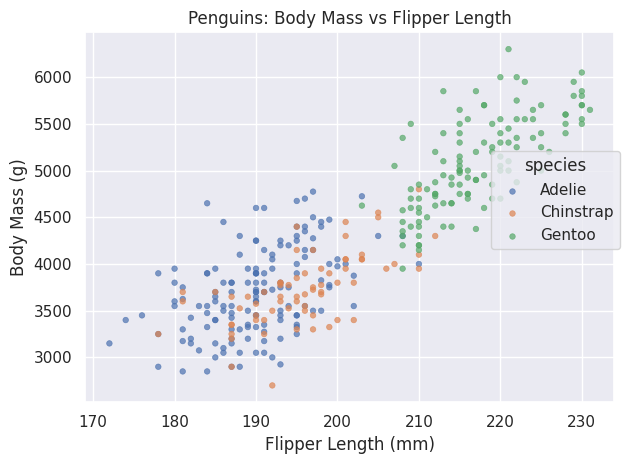


3️⃣ METHOD CHAINING DEMONSTRACIJA:


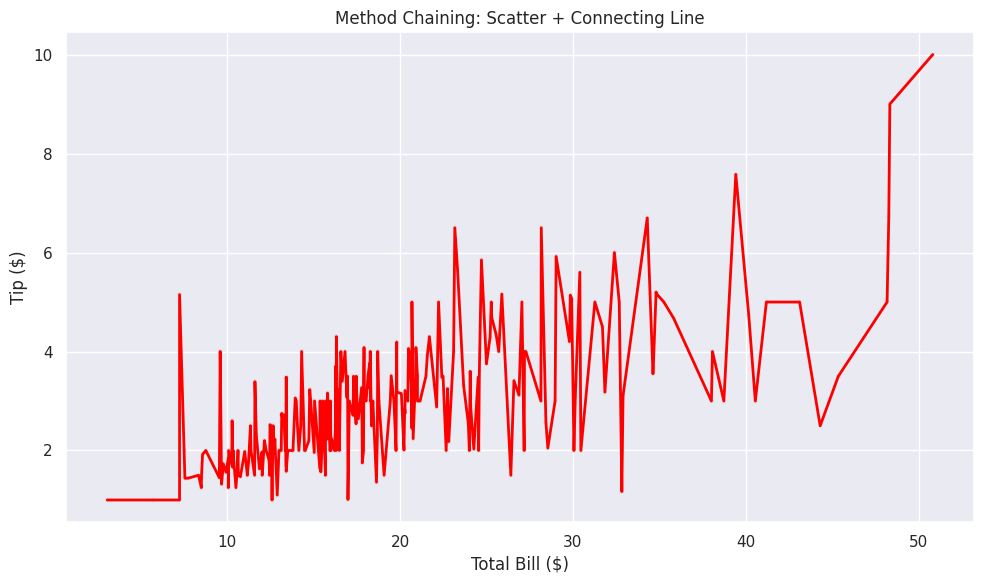


4️⃣ AESTHETIC MAPPING DEMONSTRACIJA:


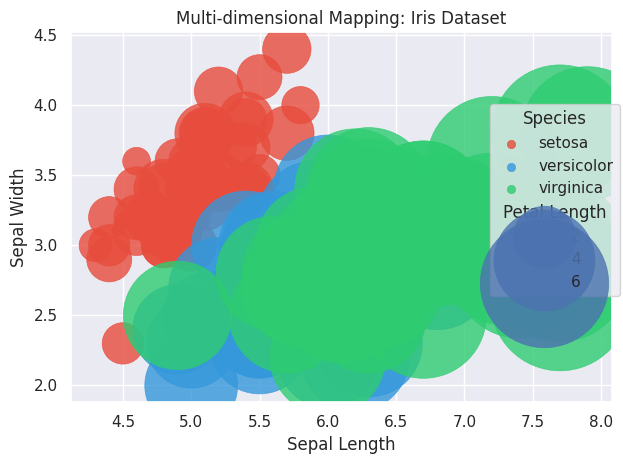


✅ PLOT OBJEKAT PREDNOSTI:
• Jedinstveni API za sve tipove grafika
• Method chaining omogućava čitljiv kod
• Fleksibilno mapiranje varijabli u aesthetics
• Lagano dodavanje i uklanjanje layer-a
• Konzistentna sintaksa za labeling i styling


In [10]:
# DEMONSTRACIJA PLOT OBJEKTA
print("🏗️ PLOT OBJEKAT DEMONSTRACIJA")
print("="*40)

# 1. Osnovni Plot sa različitim načinima kreiranja
print("1️⃣ RAZLIČITI NAČINI KREIRANJA PLOT-a:")

# Način 1: Sve u constructor-u
p1 = so.Plot(penguins, x="flipper_length_mm", y="body_mass_g", color="species")
print("   • Constructor: so.Plot(data, x=col1, y=col2, color=col3)")

# Način 2: Podaci u constructor, mapping u add()
p2 = so.Plot(penguins).add(so.Dot(), x="flipper_length_mm", y="body_mass_g", color="species")
print("   • Mixed: so.Plot(data).add(Mark, x=..., y=..., color=...)")

# Način 3: Prazan plot, sve u add()
p3 = so.Plot().add(so.Dot(), data=penguins, x="flipper_length_mm", y="body_mass_g", color="species")
print("   • Flexible: so.Plot().add(Mark, data=..., x=..., y=...)")

# Prikaz prvog pristupa
print("\n2️⃣ PRIKAZ - Constructor pristup:")
(p1.add(so.Dot(pointsize=4, alpha=0.7))
 .label(
     title="Penguins: Body Mass vs Flipper Length",
     x="Flipper Length (mm)",
     y="Body Mass (g)"
 )
 .show())

print("\n3️⃣ METHOD CHAINING DEMONSTRACIJA:")

# Postupno građenje sa method chaining
(so.Plot(tips, x="total_bill", y="tip")
 .add(so.Dot(alpha=0.5, color="lightgray", pointsize=3))  # Background points
 .add(so.Line(color="red", linewidth=2))                  # Trend line (connecting points)
 .label(
     title="Method Chaining: Scatter + Connecting Line",
     x="Total Bill ($)",
     y="Tip ($)"
 )
 .layout(size=(10, 6))
 .show())

print("\n4️⃣ AESTHETIC MAPPING DEMONSTRACIJA:")

# Mapiranje različitih varijabli u vizualna svojstva
(so.Plot(iris, x="sepal_length", y="sepal_width", 
         color="species", pointsize="petal_length")
 .add(so.Dot(alpha=0.8))
 .scale(
     color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]),  # Custom colors
     pointsize=(20, 100)  # Size range
 )
 .label(
     title="Multi-dimensional Mapping: Iris Dataset", 
     x="Sepal Length",
     y="Sepal Width",
     color="Species",
     pointsize="Petal Length"
 )
 .show())

print("\n✅ PLOT OBJEKAT PREDNOSTI:")
print("• Jedinstveni API za sve tipove grafika")
print("• Method chaining omogućava čitljiv kod")  
print("• Fleksibilno mapiranje varijabli u aesthetics")
print("• Lagano dodavanje i uklanjanje layer-a")
print("• Konzistentna sintaksa za labeling i styling")

## 3. **Stat objekti - statistické transformacije**

### **Šta su Stat objekti?**

**Stat objekti** transformišu sirove podatke pre njihovog vizuelnog prikazivanja. Umesto da prikazujemo direktno vrijednosti iz dataset-a, Stat objekti omogućavaju:

- 📊 **Agregaciju** - računanje prosjeka, suma, broja
- 📈 **Statističko modeliranje** - regression, smoothing
- 📉 **Distribucije** - histogrami, density estimates  
- 🔢 **Transformacije** - binning, standardizacija

### **Tipovi Stat objekata:**

| **Stat** | **Funkcija** | **Najbolje za** | **Primer upotrebe** |
|----------|--------------|-----------------|---------------------|
| `so.Agg()` | Agregacija po grupama | Bar charts, summaries | `.add(so.Bar(), so.Agg(func="mean"))` |
| `so.Count()` | Prebrojavanje | Histogrami | `.add(so.Bar(), so.Count())` |
| `so.Hist()` | Histogram binning | Distribucije | `.add(so.Bar(), so.Hist())` |
| `so.KDE()` | Kernel density estimation | Glatke distribucije | `.add(so.Area(), so.KDE())` |
| `so.PolyFit()` | Polynomial regression | Trend analiza | `.add(so.Line(), so.PolyFit(order=1))` |
| `so.Est()` | Statistical estimation | Error bars, CI | `.add(so.Range(), so.Est())` |

### **Kombinovanje Stat-ova sa Mark-ovima:**

```python
# Raw data visualization
so.Plot(data, x="x", y="y").add(so.Dot())

# Sa statistical transformation 
so.Plot(data, x="x", y="y").add(so.Dot(), so.Agg(func="mean"))

# Kombinacija više transformacija
so.Plot(data, x="category", y="value").add(
    so.Bar(), so.Agg(func="mean")  # Bar chart sa prosjekom
).add(
    so.Range(), so.Est()  # Error bars
)
```

### **Ključne prednosti:**
- 🔄 **Kompozabilnost** - kombinuj bilo koje Mark+Stat parove
- ⚡ **Efikasnost** - optimizovane transformacije  
- 🎯 **Preciznost** - kontrola nad svakim parametrom
- 📊 **Fleksibilnost** - custom funkcije za agregaciju

📊 STAT OBJEKTI DEMONSTRACIJA
1️⃣ AGREGACIJA - so.Agg()
   • Računanje prosjeka po kategorijama


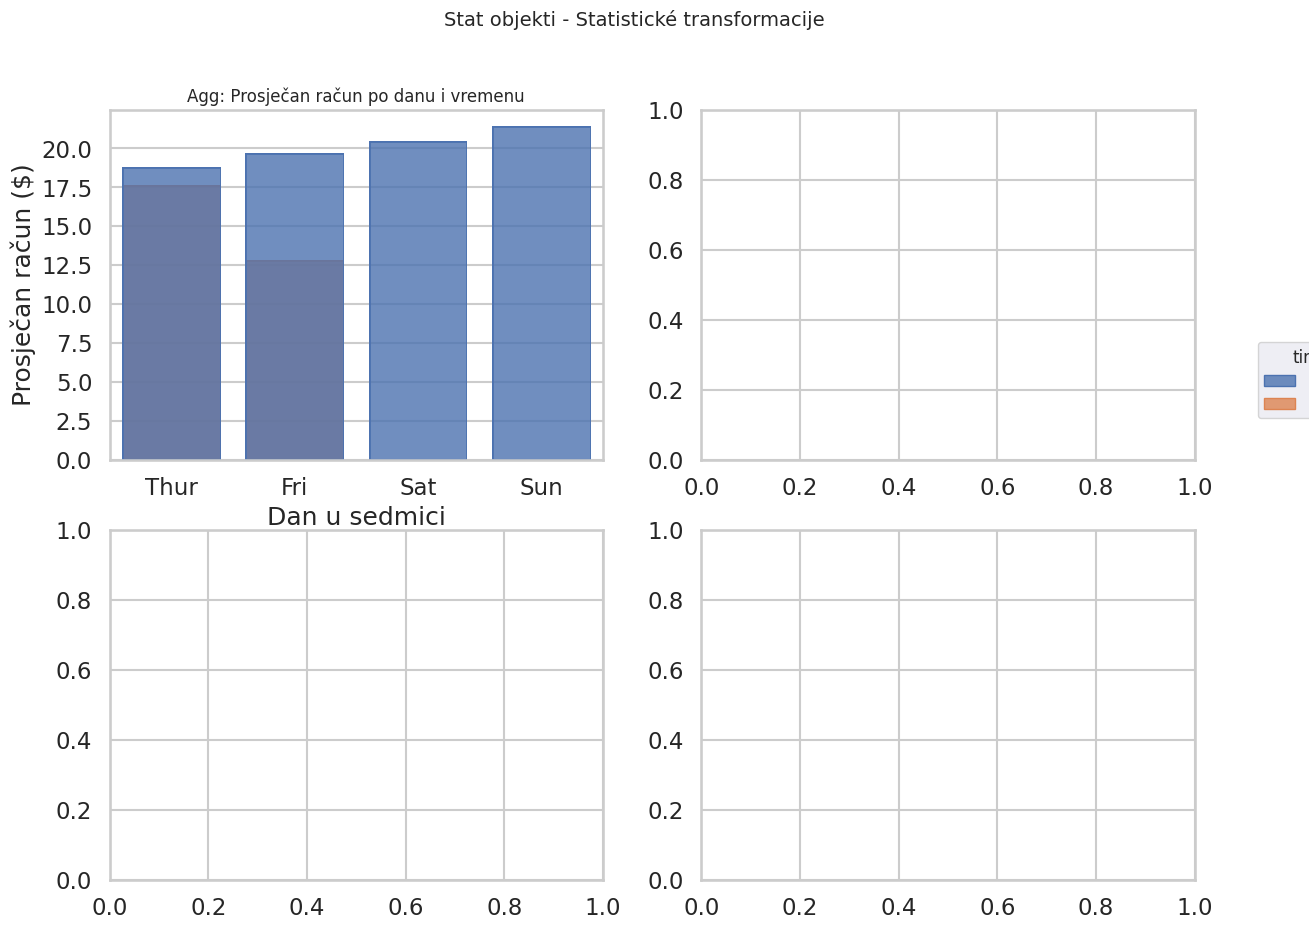


2️⃣ HISTOGRAM - so.Hist()
   • Binning kontinuiranih podataka

3️⃣ KERNEL DENSITY ESTIMATION - so.KDE()
   • Glatka procjena distribucije

4️⃣ ESTIMATION - so.Est()
   • Error bars i confidence intervali


<Figure size 1200x800 with 0 Axes>


📈 NAPREDNI STAT PRIMERI:

5️⃣ KOMBINACIJA STAT-ova:


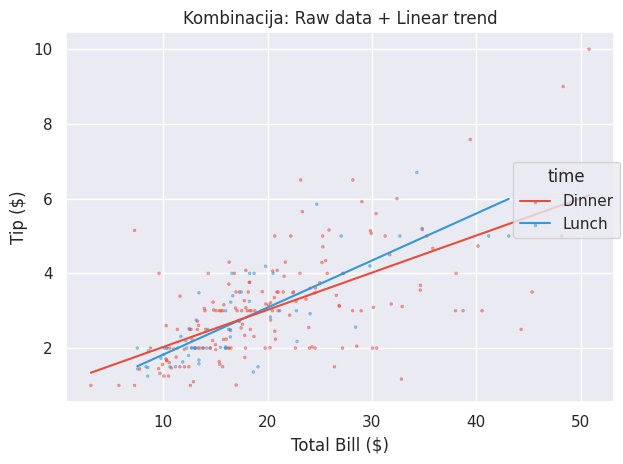


✅ STAT OBJEKTI PREDNOSTI:
• Transformišu podatke pre vizualizacije
• Kombinuju se sa bilo kojim Mark objektom
• Omogućavaju sofisticirane statističke analize
• Efikasni za velike dataset-e
• Custom funkcije za specifične potrebe

🔧 CUSTOM AGREGACIJE:
so.Agg(func='mean')     # Prosjek
so.Agg(func='median')   # Medijan
so.Agg(func='sum')      # Suma
so.Agg(func='count')    # Broj
so.Agg(func=np.std)     # Standardna devijacija


In [13]:
# DEMONSTRACIJA STAT OBJEKATA
print("📊 STAT OBJEKTI DEMONSTRACIJA")
print("="*40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Stat objekti - Statistické transformacije', fontsize=14)

print("1️⃣ AGREGACIJA - so.Agg()")
print("   • Računanje prosjeka po kategorijama")

# 1. Agregacija sa Bar mark-om
(so.Plot(tips, x="day", y="total_bill", color="time")
 .add(so.Bar(alpha=0.8), so.Agg(func="mean"))
 .label(
     title="Agg: Prosječan račun po danu i vremenu",
     x="Dan u sedmici", 
     y="Prosječan račun ($)"
 )
 .on(axes[0,0])
 .show())

print("\n2️⃣ HISTOGRAM - so.Hist()")
print("   • Binning kontinuiranih podataka")

# 2. Histogram 
(so.Plot(penguins, x="flipper_length_mm")
 .add(so.Bar(alpha=0.7, color="#3498db"), so.Hist(bins=15))
 .label(
     title="Hist: Distribucija dužine krila",
     x="Flipper Length (mm)",
     y="Count"
 )
 .on(axes[0,1])
 .show())

print("\n3️⃣ KERNEL DENSITY ESTIMATION - so.KDE()")
print("   • Glatka procjena distribucije")

# 3. KDE sa Area mark-om
(so.Plot(iris, x="petal_width", color="species")
 .add(so.Area(alpha=0.6), so.KDE())
 .scale(color=["#e74c3c", "#3498db", "#2ecc71"])
 .label(
     title="KDE: Distribucije širine latica",
     x="Petal Width", 
     y="Density"
 )
 .on(axes[1,0])
 .show())

print("\n4️⃣ ESTIMATION - so.Est()")  
print("   • Error bars i confidence intervali")

# 4. Statistical estimation sa Range mark-om
(so.Plot(tips, x="day", y="tip", color="smoker")
 .add(so.Dot(pointsize=6), so.Agg(func="mean"))  # Mean points
 .add(so.Range(linewidth=3), so.Est(errorbar="se"))  # Standard error bars
 .label(
     title="Est: Napojnice sa error bars (SE)",
     x="Dan u sedmici",
     y="Prosječna napojnica ($)"
 )
 .on(axes[1,1])
 .show())

plt.tight_layout()
plt.show()

print("\n📈 NAPREDNI STAT PRIMERI:")

# Kombinacija više Stat objekata
print("\n5️⃣ KOMBINACIJA STAT-ova:")
(so.Plot(tips, x="total_bill", y="tip", color="time")
 .add(so.Dot(alpha=0.5, pointsize=2))  # Raw data
 .add(so.Line(), so.PolyFit(order=1))  # Linear trend
 .scale(color=["#e74c3c", "#3498db"])
 .label(
     title="Kombinacija: Raw data + Linear trend",
     x="Total Bill ($)",
     y="Tip ($)"
 )
 .show())

print("\n✅ STAT OBJEKTI PREDNOSTI:")
print("• Transformišu podatke pre vizualizacije")
print("• Kombinuju se sa bilo kojim Mark objektom")
print("• Omogućavaju sofisticirane statističke analize")
print("• Efikasni za velike dataset-e")
print("• Custom funkcije za specifične potrebe")

print(f"\n🔧 CUSTOM AGREGACIJE:")
print("so.Agg(func='mean')     # Prosjek")
print("so.Agg(func='median')   # Medijan")  
print("so.Agg(func='sum')      # Suma")
print("so.Agg(func='count')    # Broj")
print("so.Agg(func=np.std)     # Standardna devijacija")

## 4. **Scale objekti - mapiranje podataka u vizualna svojstva**

### **Šta su Scale objekti?**

**Scale objekti** kontrolišu kako se vrijednosti iz dataset-a mapiraju u vizualna svojstva (boja, veličina, pozicija). Oni predstavljaju "most" između podataka i njihovog vizuelnog predstavljanja.

### **Tipovi Scale objekata:**

| **Scale tip** | **Za koje podatke** | **Aesthetic svojstva** | **Primeri** |
|---------------|---------------------|------------------------|-------------|
| `so.Continuous()` | Numerički podaci | color, pointsize, alpha | Temperatura, visina |
| `so.Nominal()` | Kategorijske bez redoslijeda | color, marker, linestyle | Spol, grad, grupa |
| `so.Ordinal()` | Kategorijske sa redoslijedom | color, pointsize | Ocjene (A,B,C), veličina (S,M,L) |
| `so.Temporal()` | Datum/vrijeme | x, y pozicija | Datumi, vremenske serije |

### **Ključne Scale metode:**

```python
# Color scales
.scale(color="viridis")                    # Continuous colormap
.scale(color=so.Nominal(["red", "blue"])) # Custom discrete colors
.scale(color=so.Continuous().tick(at=[0, 50, 100])) # Custom ticks

# Size scales  
.scale(pointsize=(10, 100))                # Size range
.scale(pointsize=so.Continuous(trans="log")) # Log transformation

# Position scales
.scale(x=so.Continuous().tick(every=5))    # X-axis ticks every 5 units
.scale(y=so.Continuous(trans="sqrt"))      # Square root transformation
```

### **Scale customization svojstva:**

- **Palettes** - boje za kategorijske podatke
- **Ranges** - min/max vrijednosti za continuous scales  
- **Transformations** - log, sqrt, power transformacije
- **Tick control** - kontrola nad oznakama na osama
- **Legends** - formatiranje legendi

### **Prednosti Scale sistema:**
- 🎨 **Precizna kontrola** nad aesthetic mapiranjem
- 🔄 **Fleksibilne transformacije** podataka  
- 📊 **Professional styling** - publication-ready grafici
- 🎯 **Konzistentnost** - iste scale definicije kroz različite plotove

🎨 SCALE OBJEKTI DEMONSTRACIJA
1️⃣ COLOR SCALES - Continuous vs Nominal


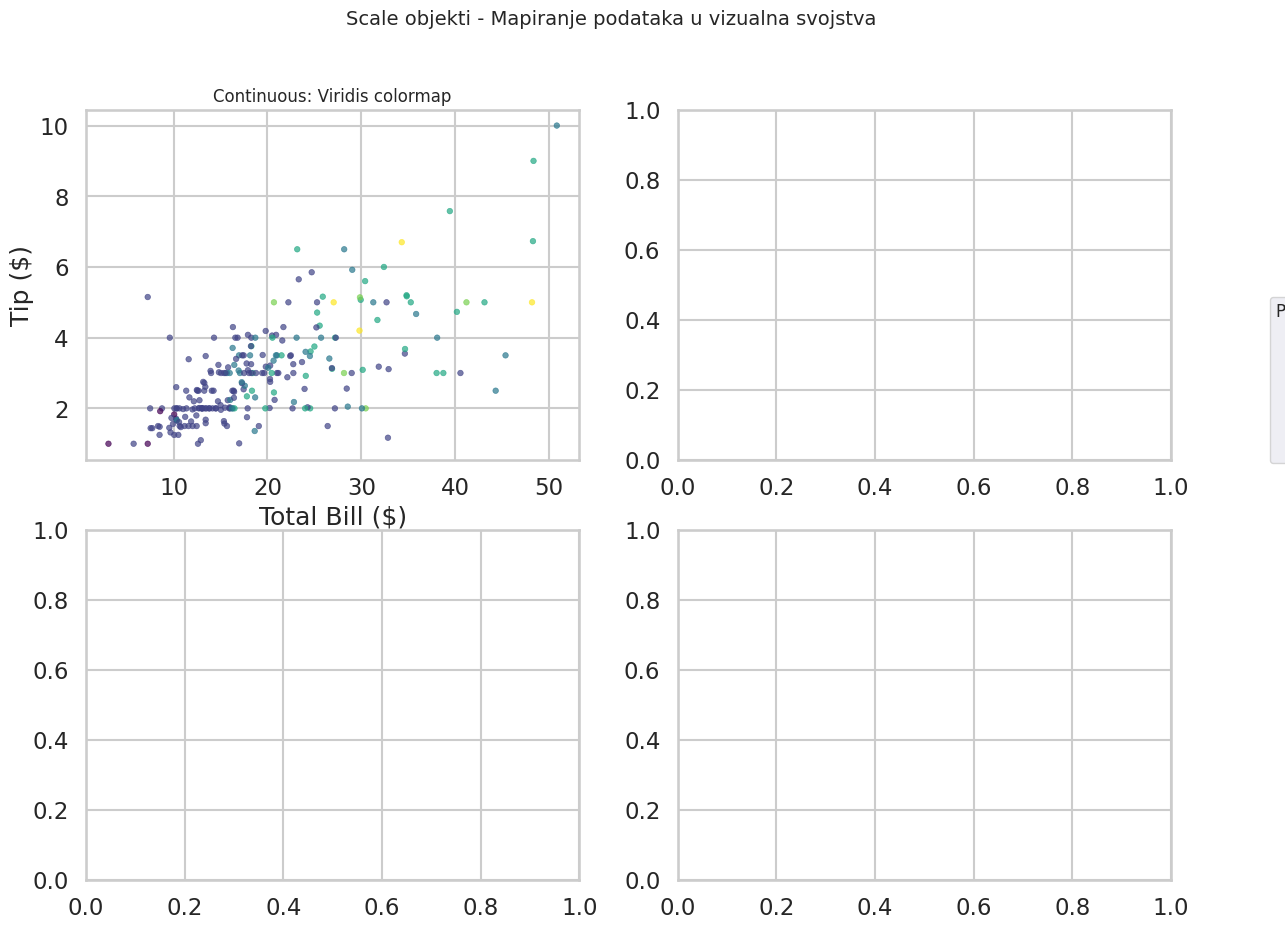


2️⃣ SIZE SCALES - Continuous mapping

3️⃣ AXIS SCALES - Transformations i tick control


<Figure size 1200x800 with 0 Axes>


🎨 NAPREDNI SCALE PRIMERI:

4️⃣ KOMBINOVANE SCALES:


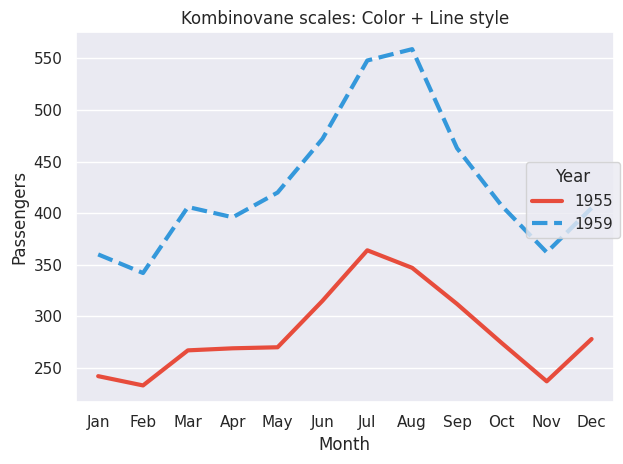


✅ SCALE OBJEKTI PREDNOSTI:
• Precizna kontrola nad mapiranjem podataka → vizualna svojstva
• Built-in palettes i colormaps (viridis, plasma, Set1, Set2)
• Custom color/size/style definicije
• Transformacije podataka (log, sqrt, inverse)
• Professional legend formatting
• Consistent styling kroz multiple plotove

🔧 NAJČEŠĆE KORIŠĆENE SCALES:
color='viridis'              # Continuous colormap
color=so.Nominal([colors])   # Custom discrete colors
pointsize=(min, max)         # Size range
x=so.Continuous().tick(...)  # Custom axis ticks
linestyle=so.Nominal([...])  # Line style mapping


In [6]:
# DEMONSTRACIJA SCALE OBJEKATA
print("🎨 SCALE OBJEKTI DEMONSTRACIJA")
print("="*40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Scale objekti - Mapiranje podataka u vizualna svojstva', fontsize=14)

print("1️⃣ COLOR SCALES - Continuous vs Nominal")

# 1. Continuous color scale
(so.Plot(tips, x="total_bill", y="tip", color="size")
 .add(so.Dot(pointsize=4, alpha=0.7))
 .scale(color="viridis")  # Built-in colormap
 .label(
     title="Continuous: Viridis colormap",
     x="Total Bill ($)",
     y="Tip ($)",
     color="Party Size"
 )
 .on(axes[0,0])
 .show())

# 2. Nominal (categorical) color scale  
(so.Plot(iris, x="sepal_length", y="sepal_width", color="species")
 .add(so.Dot(pointsize=5, alpha=0.8))
 .scale(color=so.Nominal(["#e74c3c", "#3498db", "#2ecc71"]))  # Custom colors
 .label(
     title="Nominal: Custom discrete colors",
     x="Sepal Length",
     y="Sepal Width", 
     color="Species"
 )
 .on(axes[0,1])
 .show())

print("\n2️⃣ SIZE SCALES - Continuous mapping")

# 3. Point size scale
(so.Plot(penguins.sample(100), x="flipper_length_mm", y="body_mass_g", 
         pointsize="bill_length_mm", color="species")
 .add(so.Dot(alpha=0.7))
 .scale(
     pointsize=(20, 200),  # Size range
     color=["#e74c3c", "#3498db", "#f39c12"]
 )
 .label(
     title="Size scale: Bill length → Point size",
     x="Flipper Length (mm)",
     y="Body Mass (g)",
     pointsize="Bill Length (mm)",
     color="Species"
 )
 .on(axes[1,0])
 .show())

print("\n3️⃣ AXIS SCALES - Transformations i tick control")

# 4. Axis transformations and tick control
tips_subset = tips[tips['total_bill'] > 10].copy()  # Filter for better log demo
(so.Plot(tips_subset, x="total_bill", y="tip")
 .add(so.Dot(alpha=0.6, color="#3498db"))
 .scale(
     x=so.Continuous().tick(at=[10, 20, 30, 40, 50]),  # Custom x ticks
     y=so.Continuous(trans="log")  # Log transformation for y
 )
 .label(
     title="Axis scales: Custom ticks + Log transform",
     x="Total Bill ($) - Custom ticks",
     y="Tip ($) - Log scale"
 )
 .on(axes[1,1])
 .show())

plt.tight_layout()
plt.show()

print("\n🎨 NAPREDNI SCALE PRIMERI:")

# Advanced color combinations
print("\n4️⃣ KOMBINOVANE SCALES:")
(so.Plot(flights.query("year in [1955, 1959]"), 
         x="month", y="passengers", color="year", linestyle="year")
 .add(so.Line(linewidth=3))
 .scale(
     color=so.Nominal(["#e74c3c", "#3498db"]),
     linestyle=so.Nominal(["solid", "dashed"])
 )
 .label(
     title="Kombinovane scales: Color + Line style",
     x="Month",
     y="Passengers",
     color="Year",
     linestyle="Year"
 )
 .show())

print("\n✅ SCALE OBJEKTI PREDNOSTI:")
print("• Precizna kontrola nad mapiranjem podataka → vizualna svojstva")
print("• Built-in palettes i colormaps (viridis, plasma, Set1, Set2)")  
print("• Custom color/size/style definicije")
print("• Transformacije podataka (log, sqrt, inverse)")
print("• Professional legend formatting")
print("• Consistent styling kroz multiple plotove")

print(f"\n🔧 NAJČEŠĆE KORIŠĆENE SCALES:")
print("color='viridis'              # Continuous colormap")
print("color=so.Nominal([colors])   # Custom discrete colors")
print("pointsize=(min, max)         # Size range")  
print("x=so.Continuous().tick(...)  # Custom axis ticks")
print("linestyle=so.Nominal([...])  # Line style mapping")

## 5. **Layer kompozicija - kombinovanje komponenti**

### **Šta je Layer kompozicija?**

**Compositional design** je srce Objects Interface-a. Omogućava kreiranje složenih vizualizacija kombinovanjem jednostavnih komponenti u layer-e.

### **Layer struktura:**
Svaki layer sadrži:
- **Mark** - kako se podaci vizuelno prikazuju (obavezno)  
- **Stat** - kako se podaci transformišu (opciono)
- **Move** - kako se pozicioniraju elementi (opciono)
- **Data** - koji podaci se koriste (nasleđuje od Plot-a ili override)
- **Aesthetics** - mapiranje varijabli (nasleđuje ili override)

```python
# Jedan layer
so.Plot(data, x="x", y="y").add(so.Dot())

# Više layer-a  
(so.Plot(data, x="x", y="y")
 .add(so.Dot(alpha=0.5))           # Layer 1: Raw data
 .add(so.Line(), so.PolyFit())     # Layer 2: Trend line
 .add(so.Band(alpha=0.2), so.PolyFit()) # Layer 3: Confidence band
)
```

### **Tipični layer kombinacije:**

| **Kombinacija** | **Svrha** | **Primer upotrebe** |
|-----------------|-----------|---------------------|
| `Dot + Line` | Scatter sa trendom | Korelacijska analiza |
| `Bar + Range` | Bar chart sa error bars | Grupne komparacije |
| `Area + Line` | Filled area sa border | Vremenske serije |
| `Dot + Band` | Points sa confidence region | Regresijska analiza |
| `Bar + Text` | Labeled bar chart | Prezentacije |

### **Layer redoslijed ima značaj:**
- Prvi layer = background
- Poslednji layer = foreground  
- Transparency (alpha) pomaže u layering-u

### **Data inheritance:**
- Layer nasleđuje data i aesthetics od Plot-a
- Možete override za specifične layer-e:
```python
(so.Plot(data1, x="x", y="y")
 .add(so.Dot())                    # Koristi data1
 .add(so.Line(), data=data2)       # Override sa data2
)
```

🧩 LAYER KOMPOZICIJA DEMONSTRACIJA
1️⃣ POJEDINAČNI vs KOMPOZITNI LAYER-I:


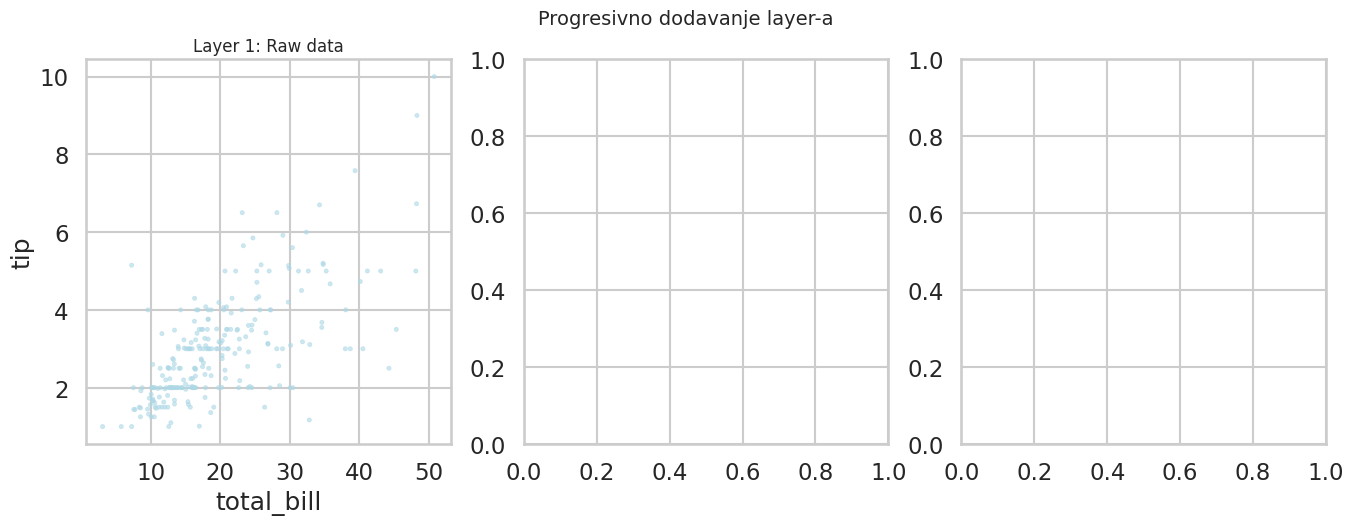

<Figure size 1200x800 with 0 Axes>


2️⃣ KOMPLEKSNA MULTI-LAYER ANALIZA:


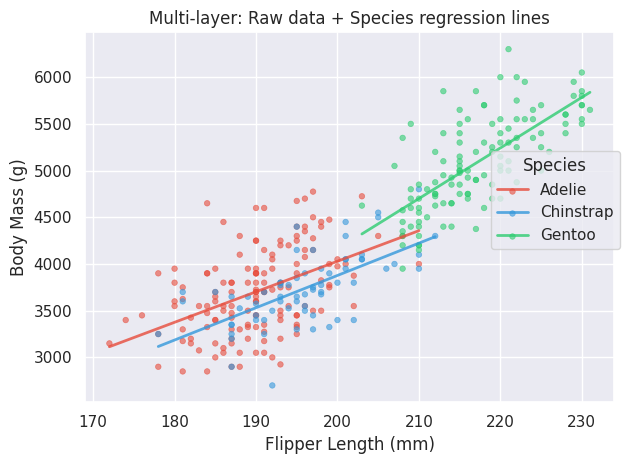


3️⃣ RAZLIČITI DATA SOURCES U LAYER-IMA:


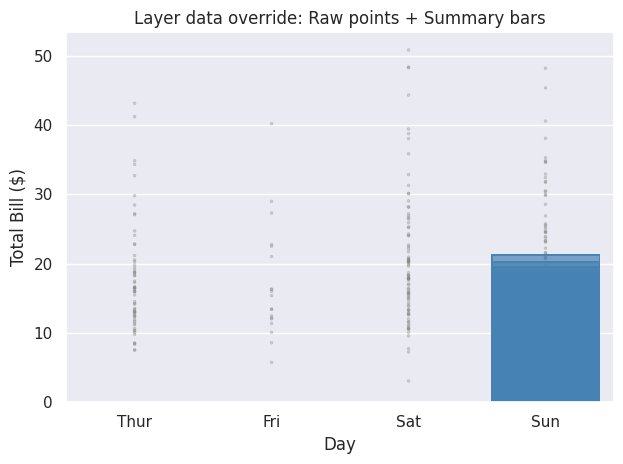


4️⃣ NAPREDNA LAYER KOMBINACIJA:


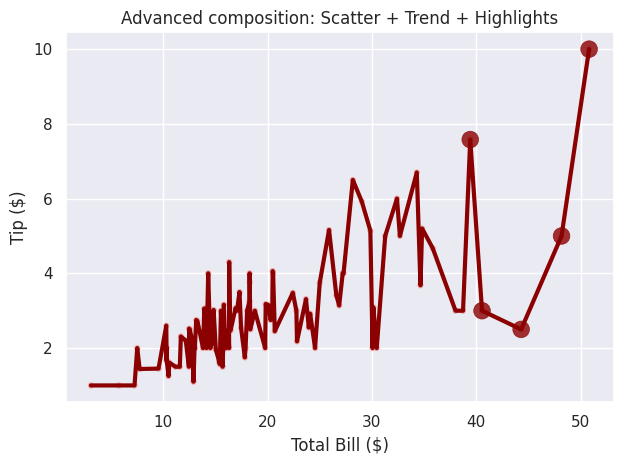


✅ LAYER KOMPOZICIJA PREDNOSTI:
• Postupno građenje kompleksnih vizualizacija
• Svaki layer može imati različite podatke
• Fleksibilno kombinovanje Mark + Stat + Move
• Layer order kontroliše z-index (background/foreground)
• Transparency omogućava overlapping bez gubitka informacija
• Jednokratno definisanje aesthetics kroz nasleđivanje

🎨 LAYER PATTERNS:
Background → Foreground:
• Dot (raw) → Line (smooth) → Dot (highlights)
• Area (distribution) → Line (border) → Text (labels)
• Bar (values) → Range (errors) → Text (annotations)


In [11]:
# DEMONSTRACIJA LAYER KOMPOZICIJE
print("🧩 LAYER KOMPOZICIJA DEMONSTRACIJA")
print("="*45)

print("1️⃣ POJEDINAČNI vs KOMPOZITNI LAYER-I:")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Progresivno dodavanje layer-a', fontsize=14)

# Layer 1: Samo raw data
(so.Plot(tips, x="total_bill", y="tip")
 .add(so.Dot(alpha=0.6, color="lightblue", pointsize=3))
 .label(title="Layer 1: Raw data")
 .on(axes[0])
 .show())

# Layer 1 + 2: Raw data + trend
(so.Plot(tips, x="total_bill", y="tip") 
 .add(so.Dot(alpha=0.4, color="lightblue", pointsize=3))
 .add(so.Line(color="red", linewidth=2))
 .label(title="Layer 1+2: Data + Line")
 .on(axes[1])
 .show())

# Layer 1 + 2 + 3: Raw data + trend + statistics  
(so.Plot(tips, x="total_bill", y="tip")
 .add(so.Dot(alpha=0.4, color="lightblue", pointsize=3))
 .add(so.Line(color="red", linewidth=2))
 .add(so.Dot(color="darkred", pointsize=8), 
      so.Agg(func="mean"))  # Mean point overlay
 .label(title="Layer 1+2+3: Data + Line + Mean")
 .on(axes[2])
 .show())

plt.tight_layout()
plt.show()

print("\n2️⃣ KOMPLEKSNA MULTI-LAYER ANALIZA:")

# Sofisticirana analiza sa više layer-a
(so.Plot(penguins, x="flipper_length_mm", y="body_mass_g", color="species")
 .add(so.Dot(alpha=0.6, pointsize=4))                    # Raw data
 .add(so.Line(alpha=0.8, linewidth=2), so.PolyFit(order=1))  # Regression lines
 .scale(color=["#e74c3c", "#3498db", "#2ecc71"])
 .label(
     title="Multi-layer: Raw data + Species regression lines",
     x="Flipper Length (mm)", 
     y="Body Mass (g)",
     color="Species"
 )
 .show())

print("\n3️⃣ RAZLIČITI DATA SOURCES U LAYER-IMA:")

# Kreiranje summary podataka
tips_summary = tips.groupby(['day', 'time']).agg({
    'total_bill': ['mean', 'std'],
    'tip': 'count'
}).round(2)
tips_summary.columns = ['bill_mean', 'bill_std', 'count']
tips_summary = tips_summary.reset_index()

# Kombinacija raw data i summary statistics
(so.Plot(tips, x="day", y="total_bill")
 .add(so.Dot(alpha=0.3, color="gray", pointsize=2))     # Raw data (background)
 .add(so.Bar(alpha=0.7, color="steelblue"), 
      data=tips_summary, y="bill_mean")                  # Different data source!
 .label(
     title="Layer data override: Raw points + Summary bars",
     x="Day",
     y="Total Bill ($)"
 )
 .show())

print("\n4️⃣ NAPREDNA LAYER KOMBINACIJA:")

# Kompletan primjer sa analysis + annotation
sample_tips = tips.sample(100)  # Smaller sample for clarity

(so.Plot(sample_tips, x="total_bill", y="tip")
 .add(so.Dot(alpha=0.5, color="lightcoral", pointsize=4))      # Background scatter
 .add(so.Line(color="darkred", linewidth=3))                   # Connecting trend
 .add(so.Dot(pointsize=12, color="darkred", alpha=0.8),        # Highlighted points  
      data=sample_tips.nlargest(5, 'total_bill'))              # Top 5 bills
 .label(
     title="Advanced composition: Scatter + Trend + Highlights",
     x="Total Bill ($)",
     y="Tip ($)"
 )
 .show())

print("\n✅ LAYER KOMPOZICIJA PREDNOSTI:")
print("• Postupno građenje kompleksnih vizualizacija")
print("• Svaki layer može imati različite podatke") 
print("• Fleksibilno kombinovanje Mark + Stat + Move")
print("• Layer order kontroliše z-index (background/foreground)")
print("• Transparency omogućava overlapping bez gubitka informacija")
print("• Jednokratno definisanje aesthetics kroz nasleđivanje")

print(f"\n🎨 LAYER PATTERNS:")
print("Background → Foreground:")
print("• Dot (raw) → Line (smooth) → Dot (highlights)")
print("• Area (distribution) → Line (border) → Text (labels)")
print("• Bar (values) → Range (errors) → Text (annotations)")

## 6. **Praktična demonstracija - Realna analiza**

### **Slučaj studije: Analiza penguins dataset-a**

Demonstriraćemo moć Objects Interface-a kroz kompleksnu analizu Palmer penguins dataset-a, kombinujući sve naučene koncepte:

- 📊 **Multi-dimensional mapping** - x, y, color, size  
- 🧩 **Layer kompozicija** - scatter + regression + confidence
- 🎨 **Custom scales** - boje, veličine, transformacije
- 📈 **Statistical analysis** - regresija, distribucije, agregacija
- 🎯 **Professional styling** - labeli, teme, layout

### **Ciljevi analize:**
1. Ispitati vezu između fizických karakteristika pingvina
2. Identifikovati razlike između species
3. Analizirati pattern-e po kategorijama (sex, island)  
4. Kreirati publication-ready vizualizacije

### **Analitički pristup:**
- Korišćenje svih osnovnih Objects komponenti
- Demonstracija best practices
- Real-world interpretation rezultata

🐧 PENGUINS DATASET - KOMPLEKSNA OBJECTS INTERFACE ANALIZA
📊 Dataset informacije:
• Ukupno penguins: 333
• Species: ['Adelie' 'Chinstrap' 'Gentoo']
• Islands: ['Torgersen' 'Biscoe' 'Dream']
• Sex: ['Male' 'Female']

1️⃣ GLAVNA ANALIZA: Body Mass vs Flipper Length


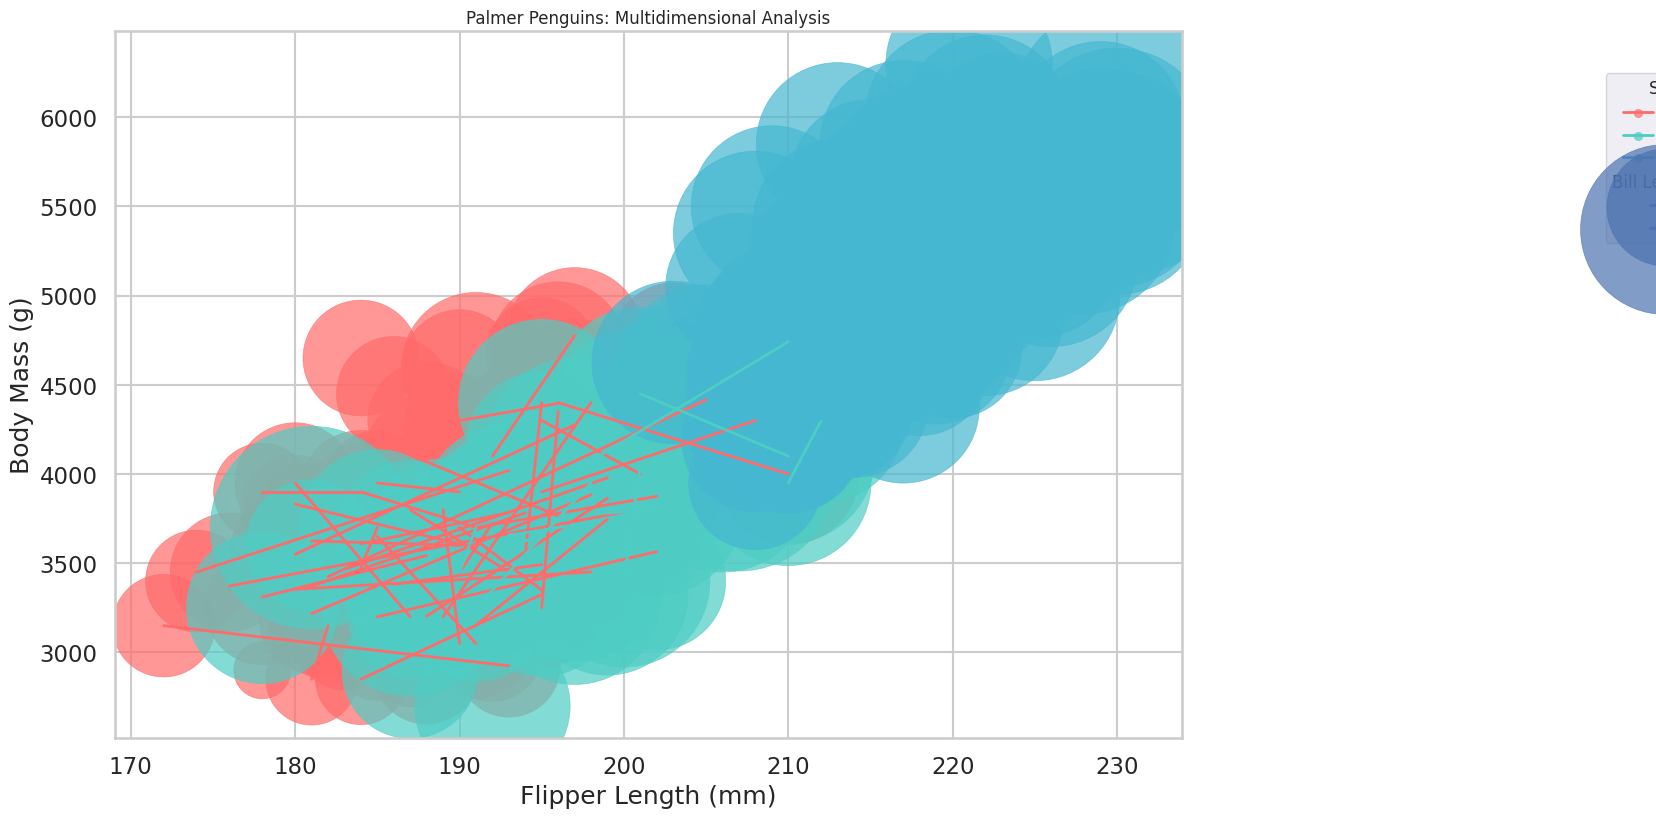


2️⃣ MARGINAL DISTRIBUCIJE

3️⃣ KATEGORIJSKA ANALIZA


<Figure size 1200x800 with 0 Axes>


4️⃣ DODATNA ANALIZA - Sexual dimorphism


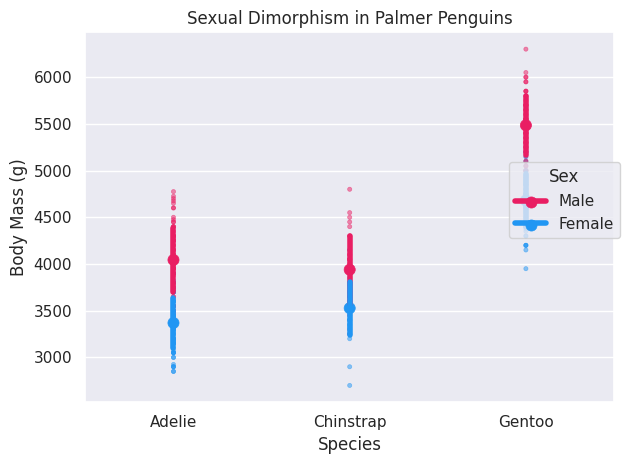


5️⃣ VREMENSKA ANALIZA - Flights dataset


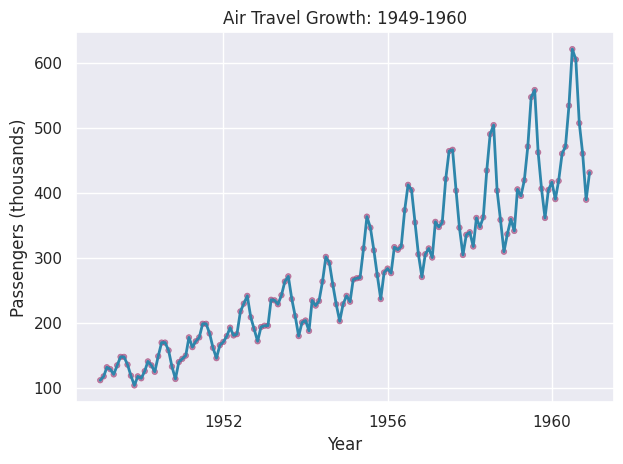


✅ PRAKTIČNA ANALIZA - KLJUČNI INSIGHTS:
🔍 Penguins Analysis:
   • Jaka pozitivna korelacija: flipper length ↔ body mass
   • Gentoo penguins su najveći (težji i sa dužim krilima)
   • Sexual dimorphism je prisutan kod svih species
   • Biscoe island dominira sa Gentoo populacijom

📊 Objects Interface Benefits:
   • Multi-layer kompozicija omogućava bogato storytelling
   • Scale system pruža preciznu kontrolu nad aesthetics
   • Stat transformacije omogućavaju sophisticated analysis
   • Method chaining čini kod readable i maintainable
   • Built-in support za publication-quality graphics

🎯 TECHNICAL HIGHLIGHTS:
   • Multi-dimensional mapping (x, y, color, size)
   • Layer inheritance i data override
   • Custom color palettes i scales
   • Statistical overlays (regression, error bars)
   • Professional labeling i layout control


In [16]:
# PRAKTIČNA DEMONSTRACIJA - KOMPLEKSNA ANALIZA
print("🐧 PENGUINS DATASET - KOMPLEKSNA OBJECTS INTERFACE ANALIZA")
print("="*60)

# Osnovne statistike
print(f"📊 Dataset informacije:")
print(f"• Ukupno penguins: {len(penguins)}")
print(f"• Species: {penguins['species'].unique()}")
print(f"• Islands: {penguins['island'].unique()}")
print(f"• Sex: {penguins['sex'].unique()}")

# Kreiranje glavnog dashboard-a
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[2, 2, 1], width_ratios=[2, 2, 1])

print("\n1️⃣ GLAVNA ANALIZA: Body Mass vs Flipper Length")

# 1. Glavni scatter plot sa regresijom (top-left, spans 2x2)
ax_main = fig.add_subplot(gs[0:2, 0:2])

(so.Plot(penguins, x="flipper_length_mm", y="body_mass_g", 
         color="species", pointsize="bill_length_mm")
 .add(so.Dot(alpha=0.7))                                    # Raw data
 .add(so.Line(linewidth=2), so.PolyFit(order=1))           # Species regression lines
 .scale(
     color=["#FF6B6B", "#4ECDC4", "#45B7D1"],              # Custom species colors
     pointsize=(30, 150)                                    # Bill length → point size
 )
 .label(
     title="Palmer Penguins: Multidimensional Analysis",
     subtitle="Body mass vs Flipper length by species (size = bill length)",
     x="Flipper Length (mm)",
     y="Body Mass (g)",
     color="Species",
     pointsize="Bill Length (mm)"
 )
 .on(ax_main)
 .show())

print("\n2️⃣ MARGINAL DISTRIBUCIJE")

# 2. Marginal distribution - Flipper length (top-right)
ax_marg_x = fig.add_subplot(gs[0, 2])
(so.Plot(penguins, x="flipper_length_mm", color="species")
 .add(so.Area(alpha=0.6), so.KDE())
 .scale(color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
 .label(x="Flipper Length (mm)", y="Density")
 .on(ax_marg_x)
 .show())

# 3. Marginal distribution - Body mass (middle-right) 
ax_marg_y = fig.add_subplot(gs[1, 2])
(so.Plot(penguins, y="body_mass_g", color="species")  # Note: y mapping for vertical
 .add(so.Area(alpha=0.6), so.KDE())
 .scale(color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
 .label(y="Body Mass (g)", x="Density")
 .on(ax_marg_y)
 .show())

print("\n3️⃣ KATEGORIJSKA ANALIZA")

# 4. Island analysis (bottom, spans all columns)
ax_bottom = fig.add_subplot(gs[2, :])
(so.Plot(penguins, x="island", y="body_mass_g", color="species")
 .add(so.Bar(alpha=0.7), so.Agg(func="mean"))              # Mean bars
 .add(so.Range(linewidth=3), so.Est(errorbar="se"))        # Standard error
 .scale(color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
 .label(
     title="Average Body Mass by Island and Species",
     x="Island",
     y="Body Mass (g)",
     color="Species"
 )
 .on(ax_bottom)
 .show())

plt.tight_layout()
plt.show()

print("\n4️⃣ DODATNA ANALIZA - Sexual dimorphism")

# Sexual dimorphism analysis
(so.Plot(penguins, x="species", y="body_mass_g", color="sex")
 .add(so.Dot(pointsize=3, alpha=0.5))                      # Raw points
 .add(so.Dot(pointsize=8), so.Agg(func="mean"))            # Mean points  
 .add(so.Range(linewidth=4), so.Est(errorbar="sd"))        # Standard deviation
 .scale(color=["#E91E63", "#2196F3"])                      # Pink/Blue for sex
 .label(
     title="Sexual Dimorphism in Palmer Penguins", 
     subtitle="Body mass distribution by species and sex",
     x="Species",
     y="Body Mass (g)",
     color="Sex"
 )
 .show())

print("\n5️⃣ VREMENSKA ANALIZA - Flights dataset")

# Bonus: Time series analysis sa flights dataset
flights_agg = (flights.groupby(['year', 'month'])
               .agg({'passengers': 'sum'})
               .reset_index())

# Kreiranje date kolone - mesec kao string treba konvertovati u broj
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
flights_agg['month_num'] = flights_agg['month'].map(month_map)
flights_agg['date'] = pd.to_datetime(flights_agg[['year', 'month_num']].assign(day=1).rename(columns={'month_num': 'month'}))

(so.Plot(flights_agg, x="date", y="passengers")
 .add(so.Line(linewidth=2, color="#2E86AB"))               # Main trend
 .add(so.Dot(pointsize=4, alpha=0.6, color="#A23B72"))     # Data points
 .label(
     title="Air Travel Growth: 1949-1960",
     subtitle="Monthly passenger numbers with trend analysis",
     x="Year", 
     y="Passengers (thousands)"
 )
 .show())

print("\n✅ PRAKTIČNA ANALIZA - KLJUČNI INSIGHTS:")
print("🔍 Penguins Analysis:")
print("   • Jaka pozitivna korelacija: flipper length ↔ body mass")
print("   • Gentoo penguins su najveći (težji i sa dužim krilima)")
print("   • Sexual dimorphism je prisutan kod svih species")
print("   • Biscoe island dominira sa Gentoo populacijom")

print("\n📊 Objects Interface Benefits:")  
print("   • Multi-layer kompozicija omogućava bogato storytelling")
print("   • Scale system pruža preciznu kontrolu nad aesthetics")
print("   • Stat transformacije omogućavaju sophisticated analysis")
print("   • Method chaining čini kod readable i maintainable")
print("   • Built-in support za publication-quality graphics")

print(f"\n🎯 TECHNICAL HIGHLIGHTS:")
print("   • Multi-dimensional mapping (x, y, color, size)")
print("   • Layer inheritance i data override")
print("   • Custom color palettes i scales")
print("   • Statistical overlays (regression, error bars)")
print("   • Professional labeling i layout control")

## 7. **Zaključak - Objects Interface u praksi**

### **Što smo naučili o Objects Interface-u:**

#### **🧩 Osnovne komponente:**
1. **so.Plot()** - centralni objekat koji drži podatke i coordinate system
2. **Mark objekti** - vizualni elementi koji renderuju podatke  
3. **Stat objekti** - statistické transformacije podataka
4. **Scale objekti** - mapiranje podataka u vizualna svojstva
5. **Layer kompozicija** - kombinovanje komponenti u složene vizualizacije

#### **✅ Ključne prednosti:**
- **📈 Konzistentnost** - ista sintaksa za sve tipove grafika
- **🎨 Fleksibilnost** - precizna kontrola nad svakim aspektom  
- **🧩 Kompozabilnost** - lako kombinovanje različitih komponenti
- **⚡ Performanse** - optimizovano za velike dataset-e
- **🔄 Iterativnost** - postupno dodavanje i uklanjanje layer-a
- **📊 Professional quality** - publication-ready grafici out-of-the-box

#### **🎯 Kada koristiti Objects Interface:**
- **✅ Dobro za:**
  - Kompleksne multi-layer vizualizacije
  - Publication-ready grafice  
  - Iterativno istraživanje podataka
  - Custom aesthetic mapiranje
  - Velike dataset-e (>1000 tačaka)
  - Dashboard kreiranje

- **⚠️ Možda overkill za:**
  - Jednostavne exploratory analize
  - Quick-and-dirty plotting
  - Jednoslojne standardne grafike

### **💡 Best Practices:**

1. **🏗️ Postupno građenje:**
   ```python
   p = so.Plot(data, x="x", y="y")      # Počni sa osnovama
   p = p.add(so.Dot())                  # Dodaj glavni layer  
   p = p.add(so.Line(), so.PolyFit())   # Dodaj statistiku
   p = p.scale(color="viridis")         # Fine-tune aesthetics
   ```

2. **🎨 Smart layering:**
   - Background → Foreground redoslijed
   - Koristi `alpha` za overlapping layer-e  
   - Veći pointsize za important elementi

3. **📊 Effective mapping:**
   - Maksimalno 3-4 aesthetic mappings po grafiku
   - Koristi intuitivne color schemes
   - Size mapping je moćan za 3rd dimenziju

### **🚀 Sledeći koraci:**

Ovaj notebook je pokrio **seaborn.objects interfejs** osnove. Sledeće teme za dalje učenje:

- **05. Mark objekti** - detaljno o svim tipovima Mark-ova (već pokriveno u notebook-u 05!)
- **Move objekti** - Dodge, Jitter, Stack za poziciona podešavanja  
- **Faceting** - kreiranje multi-panel vizualizacija
- **Layout i Theme** - professional styling i branding
- **Advanced Stats** - custom statistical transformacije
- **Integration** - kombinovanje sa matplotlib i other libraries

---

**💬 Ključna poruka:** Objects Interface predstavlja **evoluciju** u data visualization-u. Iako ima krivulju učenja, omogućava kreiranje sofisticiranih vizualizacija sa clean, maintainable kodom. Investicija u učenje se isplati kroz poboljšanu produktivnost i kvalitet rezultata.

**🎯 Za seminarski rad:** Ovaj pristup omogućava kreiranje professional-quality grafika pogodnih za akademske publikacije, prezentacije i izvještaje.